In [1]:
!pip install nltk



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
import nltk


In [3]:
import nltk # Natural Language Tool Kit
nltk.download('punkt')
#punkt - This tokenizer divides a text into a list of sentences by using an unsupervised algorithm
# to build a model for abbreviation words, collocations, and words that start sentences.
nltk.download('stopwords')
nltk.download('wordnet')
#wordnet-WordNET is a lexical database of words in more than 200 languages in which we have adjectives, adverbs, nouns,
# and verbs grouped differently into a set of cognitive synonyms, where each word in the database is expressing its distinct concept.
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
# PortStemmer - for stemming
# WordNetLematizer - for lemmatization
import re # for regular expression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
# Loading dataset with error handling
try:
    df = pd.read_csv('/content/blogs_categories.csv', quoting=3)
except pd.errors.ParserError as e:
    print(f'Error parsing CSV: {e}')
    exit()

Error parsing CSV: Error tokenizing data. C error: Expected 3 fields in line 5, saw 4



In [3]:
# Increase the CSV field size limit
import sys
csv.field_size_limit(sys.maxsize)

131072

In [4]:
# Read the file line by line and filter out malformed rows
import csv
file_path = '/content/blogs_categories.csv'
rows = []

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    header = next(reader)  # Read the header
    rows.append(header)
    for row in reader:
        if len(row) == len(header):
            rows.append(row)

In [6]:
# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(rows[1:], columns=rows[0])

# 1. Data Exploration and Preprocessing

In [7]:
# Exploratory Data Analysis
print(df.head())
print(df.info())
print(df['Labels'].value_counts())

                                                   Data       Labels
0  0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1  1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2  2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3  3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4  4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           19997 non-null  object
 1   Data    19997 non-null  object
 2   Labels  19997 non-null  object
dtypes: object(3)
memory usage: 468.8+ KB
None
Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electroni

In [9]:
# Ensure 'Data' column is treated as string
df['Data'] = df['Data'].astype(str)

In [13]:
# Preprocessing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Data'] = df['Data'].apply(preprocess_text)

In [14]:
df['Data'] = df['Data'].apply(preprocess_text)

In [16]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Data']).toarray()
y = df['Labels']

# 2. Naive Bayes Model for Text Classification

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [23]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8755
Precision: 0.8750922365800601
Recall: 0.8755
F1 Score: 0.8734175573402059
                          precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88     

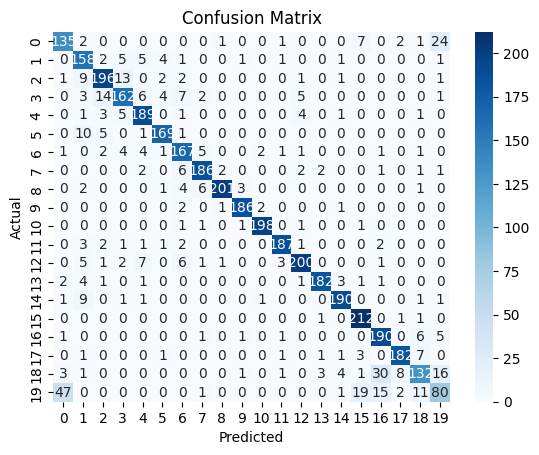

In [26]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Sentiment Analysis

In [27]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [29]:
from textblob import TextBlob
df['Sentiment'] = df['Data'].apply(get_sentiment)
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

Sentiment
positive    14255
negative     5724
neutral        18
Name: count, dtype: int64


# 4. Evaluation

In [30]:
# Sentiment distribution across categories
sentiment_category_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_category_distribution)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism               0.285000      NaN  0.715000
comp.graphics             0.263000    0.001  0.736000
comp.os.ms-windows.misc   0.259000      NaN  0.741000
comp.sys.ibm.pc.hardware  0.255000    0.002  0.743000
comp.sys.mac.hardware     0.274000      NaN  0.726000
comp.windows.x            0.282000    0.005  0.713000
misc.forsale              0.231000      NaN  0.769000
rec.autos                 0.254000    0.002  0.744000
rec.motorcycles           0.345000      NaN  0.655000
rec.sport.baseball        0.312000    0.001  0.687000
rec.sport.hockey          0.347000    0.001  0.652000
sci.crypt                 0.264000      NaN  0.736000
sci.electronics           0.252000      NaN  0.748000
sci.med                   0.282000    0.002  0.716000
sci.space                 0.276000    0.001  0.723000
soc.religion.christian    0.232698      NaN  0.767302
talk.politics.guns        0.

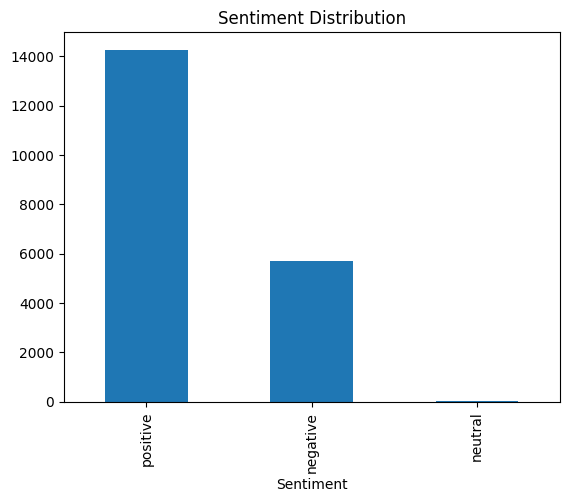

In [31]:
# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', title='Sentiment Distribution')
plt.show()

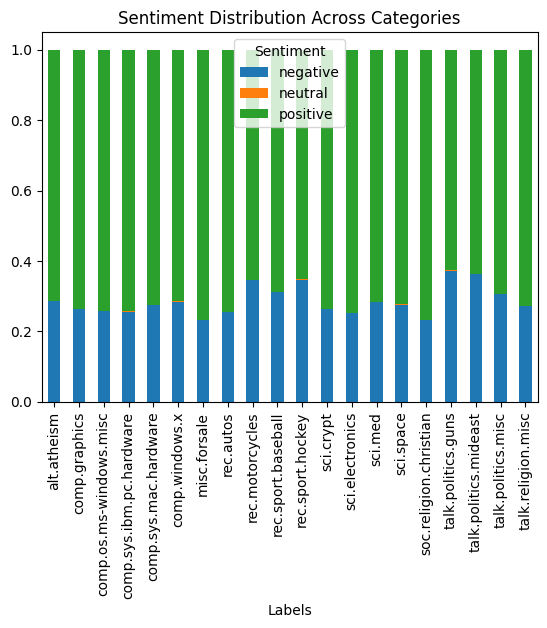

In [32]:
# Plot sentiment distribution across categories
sentiment_category_distribution.plot(kind='bar', stacked=True, title='Sentiment Distribution Across Categories')
plt.show()